In [2]:
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
os.chdir('/home/jaentrouble/adipose_train2')
print(os.getcwd())

/home/jaentrouble/adipose_train2


In [4]:
!git pull
%autoreload

Already up to date.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with np.load('cell_mask_data.npz') as data:
    X = data['img']
    Y = data['mask']
print('X shape: ', X.shape, X.dtype)
print('Y shape: ', Y.shape, Y.dtype)

X shape:  (1533, 200, 200, 3) uint8
Y shape:  (1533, 200, 200) float32


In [7]:
X_test = X[1350:]
Y_test = Y[1350:]
X_train_small = X[:100]
Y_train_small = Y[:100]

In [8]:
import tensorflow as tf
from model_trainer import get_model
from adipose_models import *

In [9]:
model_f = res_12_2_0_BN
savedfile_name = 'res_12_2_0_BN_1'
target_epoch = 50

In [10]:
test_model = get_model(model_f)
test_model.load_weights('savedmodels/'+savedfile_name+'/'+str(target_epoch))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 200, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 200, 200, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 32) 128         input_1[0][0]                    
_______________________________________________________________________________________

In [11]:
test_model.evaluate(X_train_small, Y_train_small)
test_model.evaluate(X_test, Y_test)

6/6 [==============================] - 1s 130ms/step - loss: 0.6553 - binary_accuracy: 0.8059


[0.6552675366401672, 0.8058799505233765]

In [12]:
Target_X = X_test
Target_Y = Y_test
predict = test_model(Target_X)
print(predict.shape)

(183, 200, 200)


In [13]:
import random

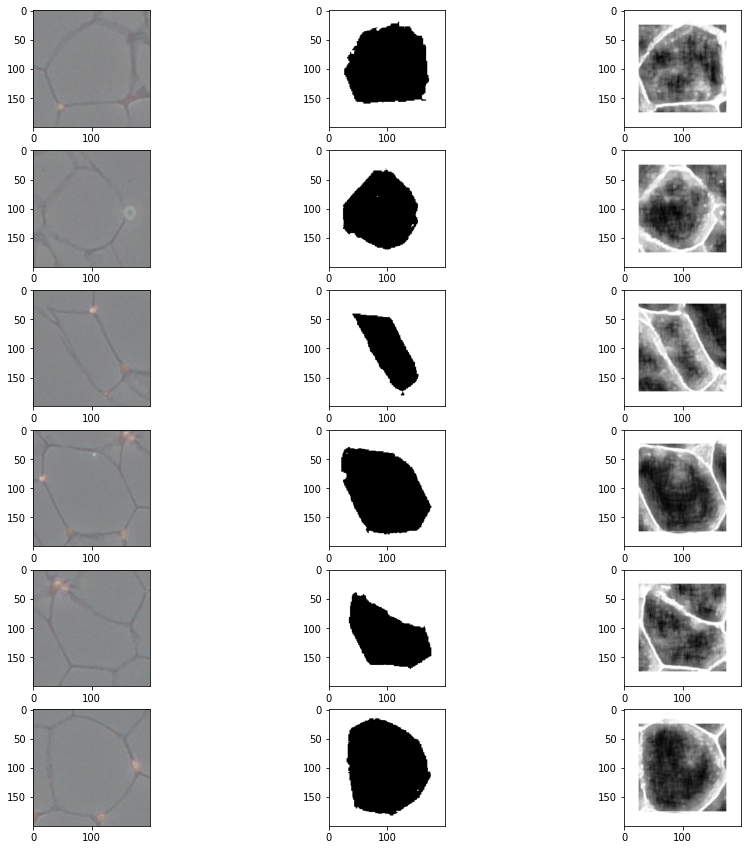

In [14]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
# r = random.randrange(0,predict.shape[0]-n)
r = 0
for img, mask, pred in zip(Target_X[r:r+n], Target_Y[r:r+n], predict[r:r+n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [15]:
print(1-np.sum(Y[3]/(200*200)))

0.6848250329494476


In [16]:
print(np.max(pred))
print(np.min(pred))

0.8959955
1.730323e-10
